In [60]:
from functions.data_by_country import data_by_country
from utils.data_loader import load_data_parquet
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.express as px

In [2]:
df = load_data_parquet()
df = data_by_country(df)
df = df.dropna()

c:\Users\gaute\OneDrive\Malmø\1st semester\AI\World_Temperature_Analysis\functions\data_by_country.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = data[["Country", "AverageTemperature", "dt", "Country_ISO"]


In [3]:
# To show how the Isolation model works, I've picked Sweden
df_sweden = df[df["Country"]=="Sweden"]
df_sweden3 = df_sweden.copy()
df_sweden3 = df_sweden3.set_index("dt")
df_sweden3

,Country,Country_ISO,AverageTemperature
dt,,,
1743-11-01,Sweden,SWE,3.7652
1744-04-01,Sweden,SWE,3.3624
1744-05-01,Sweden,SWE,8.8490
1744-06-01,Sweden,SWE,13.0116
1744-07-01,Sweden,SWE,15.6892
...,...,...,...
2013-04-01,Sweden,SWE,3.3374
2013-05-01,Sweden,SWE,11.9138
2013-06-01,Sweden,SWE,14.8738


In [4]:
df_sweden3.index

DatetimeIndex(['1743-11-01', '1744-04-01', '1744-05-01', '1744-06-01',
               '1744-07-01', '1744-09-01', '1744-10-01', '1744-11-01',
               '1744-12-01', '1745-01-01',
               ...
               '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01'],
              dtype='datetime64[ns]', name='dt', length=3166, freq=None)

In [7]:
average_by_year = df_sweden3.groupby(df_sweden3.index.year)['AverageTemperature'].mean()

<Axes: xlabel='dt'>

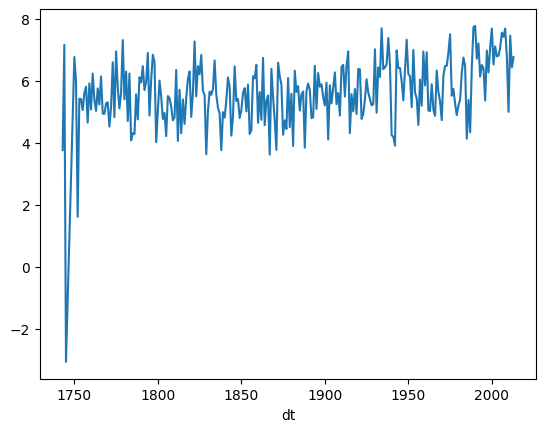

In [9]:
average_by_year.plot()

# Select a dimension

In [28]:
df_to_use = pd.DataFrame(average_by_year)
df_to_use.AverageTemperature.values.reshape(-1,1)

array([[ 3.7652    ],
       [ 7.1614    ],
       [-3.07225   ],
       [ 6.77007273],
       [ 6.014925  ],
       [ 1.6149    ],
       [ 5.41813333],
       [ 5.41725   ],
       [ 5.0583    ],
       [ 5.61021667],
       [ 5.80848333],
       [ 4.65318333],
       [ 5.9196    ],
       [ 5.07496667],
       [ 6.23558333],
       [ 5.38956667],
       [ 5.03073333],
       [ 5.75613333],
       [ 5.23873333],
       [ 6.143     ],
       [ 4.94206667],
       [ 4.9355    ],
       [ 5.26506667],
       [ 5.30828333],
       [ 4.52396667],
       [ 5.1634    ],
       [ 6.60021667],
       [ 4.8293    ],
       [ 6.95208333],
       [ 5.7814    ],
       [ 5.11296667],
       [ 5.62486667],
       [ 7.31575   ],
       [ 5.40716667],
       [ 6.30205   ],
       [ 4.70543333],
       [ 6.23911667],
       [ 4.08048333],
       [ 4.30881667],
       [ 4.28198333],
       [ 5.5651    ],
       [ 4.7558    ],
       [ 6.11526667],
       [ 5.94825   ],
       [ 6.47626667],
       [ 5

In [25]:
np.random.seed(0)
data = np.random.normal(0, 1, 1000).reshape(-1, 1)
data

array([[ 1.76405235e+00],
       [ 4.00157208e-01],
       [ 9.78737984e-01],
       [ 2.24089320e+00],
       [ 1.86755799e+00],
       [-9.77277880e-01],
       [ 9.50088418e-01],
       [-1.51357208e-01],
       [-1.03218852e-01],
       [ 4.10598502e-01],
       [ 1.44043571e-01],
       [ 1.45427351e+00],
       [ 7.61037725e-01],
       [ 1.21675016e-01],
       [ 4.43863233e-01],
       [ 3.33674327e-01],
       [ 1.49407907e+00],
       [-2.05158264e-01],
       [ 3.13067702e-01],
       [-8.54095739e-01],
       [-2.55298982e+00],
       [ 6.53618595e-01],
       [ 8.64436199e-01],
       [-7.42165020e-01],
       [ 2.26975462e+00],
       [-1.45436567e+00],
       [ 4.57585173e-02],
       [-1.87183850e-01],
       [ 1.53277921e+00],
       [ 1.46935877e+00],
       [ 1.54947426e-01],
       [ 3.78162520e-01],
       [-8.87785748e-01],
       [-1.98079647e+00],
       [-3.47912149e-01],
       [ 1.56348969e-01],
       [ 1.23029068e+00],
       [ 1.20237985e+00],
       [-3.8

In [41]:
def select_value(data,feat):
    '''
    Select values of 
    '''
    mini = data[feat].min()
    maxi = data[feat].max()
    return (maxi-mini)*np.random.random()+mini

In [43]:
var = df_to_use.AverageTemperature
var
#select_value(df_to_use.AverageTemperature.values.reshape(-1,1),var)


dt
1743    3.765200
1744    7.161400
1745   -3.072250
1750    6.770073
1751    6.014925
          ...   
2009    6.769717
2010    5.000933
2011    7.460750
2012    6.432900
2013    6.765275
Name: AverageTemperature, Length: 267, dtype: float64

In [11]:
# Function to construct an isolation tree
def isolation_tree(data, height=0, max_height=None):
    if max_height is None:
        max_height = int(np.log2(len(data)))

    # If the maximum height is reached or there's only one data point, create a leaf node
    if max_height <= 0 or len(data) <= 1:
        return {
            "data": data,
            "height": height
        }
    else:
        # Randomly select an attribute and split value
        split_attribute = np.random.randint(0, data.shape[1])
        split_value = np.random.uniform(data[:, split_attribute].min(), data[:, split_attribute].max())
        
        # Partition data into left and right sub-samples and create non-leaf nodes
        left_data = data[data[:, split_attribute] < split_value]
        right_data = data[data[:, split_attribute] >= split_value]
        
        return {
            "split_attribute": split_attribute,
            "split_value": split_value,
            "left": isolation_tree(left_data, height + 1, max_height),
            "right": isolation_tree(right_data, height + 1, max_height)
        }

In [38]:
result = isolation_tree(df_to_use.AverageTemperature.values.reshape(-1,1))
result

{'split_attribute': 0,
 'split_value': 7.6897669905666355,
 'left': {'split_attribute': 0,
  'split_value': -1.3616589955547613,
  'left': {'data': array([[-3.07225]]), 'height': 2},
  'right': {'split_attribute': 0,
   'split_value': 2.593307094967744,
   'left': {'data': array([[1.6149]]), 'height': 3},
   'right': {'split_attribute': 0,
    'split_value': 5.132780457645141,
    'left': {'split_attribute': 0,
     'split_value': 3.891295551838443,
     'left': {'split_attribute': 0,
      'split_value': 3.779494317108641,
      'left': {'split_attribute': 0,
       'split_value': 3.6569492304164264,
       'left': {'split_attribute': 0,
        'split_value': 3.6286307219186265,
        'left': {'data': array([[3.62098333]]), 'height': 8},
        'right': {'data': array([[3.62936667]]), 'height': 8}},
       'right': {'split_attribute': 0,
        'split_value': 3.7697738405568844,
        'left': {'split_attribute': 0,
         'split_value': 3.7651611293887775,
         'left': {'

In [39]:
# Function to build an isolation forest
def isolation_forest(data, n_trees=100, subsample_size=256):
    trees = []

    for _ in range(n_trees):
        # Create random subsamples and construct isolation trees
        subsample = data[np.random.choice(data.shape[0], subsample_size, replace=False)]
        itree = isolation_tree(subsample)
        trees.append(itree)

    return trees

In [44]:
result2 = isolation_forest(df_to_use.AverageTemperature.values.reshape(-1,1))
result2[1]

{'split_attribute': 0,
 'split_value': 7.435541235585262,
 'left': {'split_attribute': 0,
  'split_value': 5.522075309753006,
  'left': {'split_attribute': 0,
   'split_value': 3.8390415688713735,
   'left': {'split_attribute': 0,
    'split_value': -2.062142144176911,
    'left': {'data': array([[-3.07225]]), 'height': 4},
    'right': {'split_attribute': 0,
     'split_value': 3.684147748201295,
     'left': {'split_attribute': 0,
      'split_value': 2.1664369356628423,
      'left': {'data': array([[1.6149]]), 'height': 6},
      'right': {'data': array([[3.62936667]]), 'height': 6}},
     'right': {'split_attribute': 0,
      'split_value': 3.769110986083332,
      'left': {'split_attribute': 0,
       'split_value': 3.765115374926638,
       'left': {'data': array([[3.76505]]), 'height': 7},
       'right': {'data': array([[3.7652]]), 'height': 7}},
      'right': {'data': array([[3.774]]), 'height': 6}}}},
   'right': {'split_attribute': 0,
    'split_value': 4.675351984625191,


In [13]:
# Function to calculate anomaly score for a single data point
def anomaly_score(tree, point, current_height=0):
    if "split_attribute" not in tree:
        # If it's a leaf node, return the anomaly score
        return current_height + 2 * (np.log(2 ** tree["height"] - 1) + np.euler_gamma) - (2 * (tree["height"] - 1) / (2 ** tree["height"] - 1))
    else:
        # Randomly select an attribute for splitting
        split_attribute = tree["split_attribute"]
        
        # Determine which branch to traverse based on the split attribute and value
        if point[split_attribute] < tree["split_value"]:
            return anomaly_score(tree["left"], point, current_height + 1)
        else:
            return anomaly_score(tree["right"], point, current_height + 1)


In [32]:
# Function to compute anomaly scores for the entire dataset
def isolation_forest_anomaly_score(data, trees):
    scores = np.array([anomaly_score(trees, point) for point in data])
    return 2 ** (-scores / len(trees))

In [51]:
# Build an isolation forest
forest = isolation_forest(df_to_use.AverageTemperature.values.reshape(-1,1), n_trees=10, subsample_size=200)
forest

[{'split_attribute': 0,
  'split_value': 5.214237153511066,
  'left': {'split_attribute': 0,
   'split_value': -0.2225665842328759,
   'left': {'data': array([[-3.07225]]), 'height': 2},
   'right': {'split_attribute': 0,
    'split_value': 4.1101797487485126,
    'left': {'split_attribute': 0,
     'split_value': 3.6501503773619106,
     'left': {'split_attribute': 0,
      'split_value': 3.1004770404848117,
      'left': {'data': array([[1.6149]]), 'height': 5},
      'right': {'split_attribute': 0,
       'split_value': 3.621808552611988,
       'left': {'data': array([[3.62098333]]), 'height': 6},
       'right': {'data': array([[3.62936667]]), 'height': 6}}},
     'right': {'split_attribute': 0,
      'split_value': 3.9347447570357703,
      'left': {'split_attribute': 0,
       'split_value': 3.850796242858037,
       'left': {'split_attribute': 0,
        'split_value': 3.816684233592926,
        'left': {'split_attribute': 0,
         'split_value': 3.769093296027766,
         

In [52]:
# Calculate anomaly scores for the data
anomaly_scores = isolation_forest_anomaly_score(df_to_use.AverageTemperature.values.reshape(-1,1), forest[1])

In [53]:
anomaly_scores

array([1.99293043e-02, 5.73486114e-03, 6.88434913e-01, 1.99293043e-02,
       5.73486114e-03, 4.44037274e-01, 5.73486114e-03, 5.73486114e-03,
       2.50632492e-03, 3.79082887e-03, 1.09493315e-01, 3.02795145e-02,
       4.61642760e-02, 2.50632492e-03, 1.99293043e-02, 5.73486114e-03,
       7.24717314e-04, 3.79082887e-03, 8.67915000e-03, 8.67915000e-03,
       5.73486114e-03, 2.50632492e-03, 8.67915000e-03, 1.31439582e-02,
       4.61642760e-02, 3.79082887e-03, 8.67915000e-03, 8.67915000e-03,
       8.67915000e-03, 1.31439582e-02, 5.73486114e-03, 3.79082887e-03,
       3.02795145e-02, 5.73486114e-03, 1.31439582e-02, 8.67915000e-03,
       1.99293043e-02, 3.79082887e-03, 5.73486114e-03, 5.73486114e-03,
       1.31439582e-02, 8.67915000e-03, 1.99293043e-02, 1.31439582e-02,
       1.99293043e-02, 1.99293043e-02, 1.99293043e-02, 5.73486114e-03,
       2.50632492e-03, 5.73486114e-03, 8.67915000e-03, 8.67915000e-03,
       8.67915000e-03, 1.09590374e-03, 1.31439582e-02, 1.65726176e-03,
      

In [57]:
def visualize_anomalies_with_years(data, anomaly_scores, threshold, years):
    # Create a scatter plot of the data
    plt.figure(figsize=(12, 6))
    plt.scatter(years, data, c='b', label='Data Points', s=20)

    # Highlight anomalies based on the threshold
    anomalies = [year for year, score in zip(years, anomaly_scores) if score > threshold]
    plt.scatter(anomalies, [data[i] for i in range(len(data)) if years[i] in anomalies], c='r', label='Anomalies', s=50)

    # Set labels and legend
    plt.xlabel('Year')
    plt.ylabel('Data Value')
    plt.title('Anomaly Detection')
    plt.legend()

    # Show the plot
    plt.grid()
    plt.show()

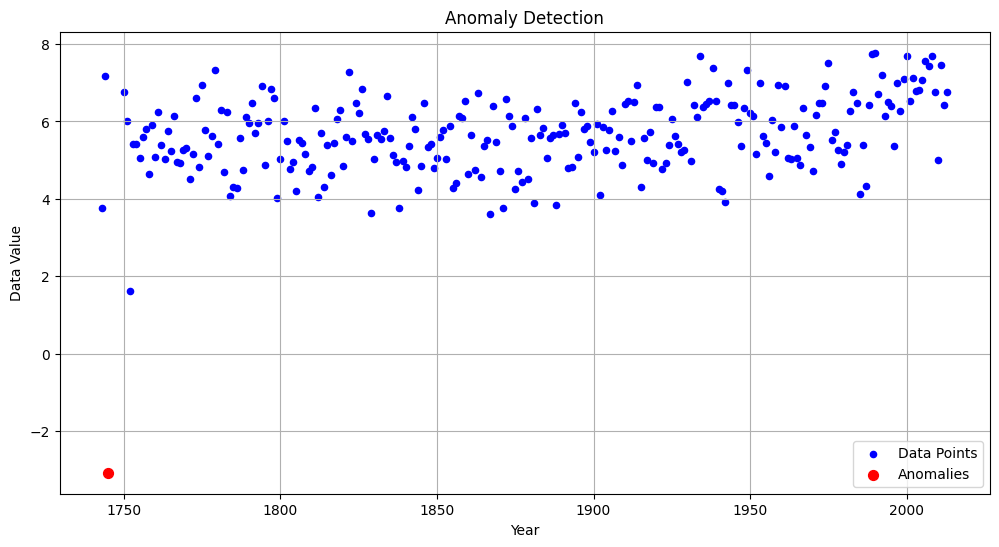

In [59]:
visualize_anomalies_with_years(df_to_use.AverageTemperature.values.reshape(-1,1), anomaly_scores, 0.5, df_to_use.index)

In [147]:
# Function to create an interactive Plotly plot for visualizing anomalies
def visualize_anomalies_with_years_plotly(data, anomaly_scores, threshold, years):
    # Flatten the anomaly_scores array
    anomaly_scores = anomaly_scores.ravel()

    # Create a DataFrame with years, data, and anomaly scores
    df = pd.DataFrame({'Year': years, 'Data': data.ravel(), 'Anomaly Score': anomaly_scores})
    
  
   # Create an interactive scatter plot
    fig = px.scatter(
        df, x='Year', y='Data',
        color='Anomaly Score',
        title='Anomaly Detection',
        color_continuous_scale=['blue', 'red'],
        labels={'Data': 'Data Value'},
    )

    # Set the anomaly score threshold (adjust this based on your problem)
    fig.add_shape(
        type='line',
        x0=years[0],
        x1=years[-1],
        y0=threshold,
        y1=threshold,
        line=dict(color='red', width=2, dash='dash')
    )

    # Show the interactive plot
    fig.show()


In [148]:
visualize_anomalies_with_years_plotly(df_to_use.AverageTemperature.values.reshape(-1,1), anomaly_scores, 0.4, df_to_use.index)